In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as sktransform

from xwp_rotation.utils import get_valid_locs
from xwp_rotation.rotate import pyvips_rotate

np.set_printoptions(precision=2)

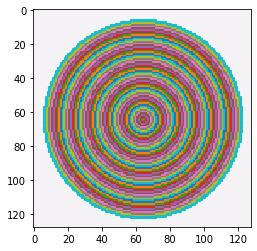

In [2]:
size = 128
a = np.zeros((size,size),dtype='float64')
b = np.zeros((size,size),dtype='float64')
c = np.zeros((size,size),dtype='float64')

angle = -30

_a = get_valid_locs(a,60,plot=1)

In [ ]:
rot_matrix_pos = np.zeros((size*size,size*size))
j = [] 
for i in range(_a.shape[1]):
    idx,idy = _a[:,i]
    a[idx,idy] = 1
    j = np.where(a.ravel()==1)
    b = pyvips_rotate(a,-angle)
    rot_matrix_pos[j,:] = b.ravel()
    a[idx,idy] = 0

In [ ]:
rot_matrix_neg = np.zeros((size*size,size*size))
j = [] 
for i in range(_a.shape[1]):
    idx,idy = _a[:,i]
    a[idx,idy] = 1
    j = np.where(a.ravel()==1)
    b = pyvips_rotate(a,+angle)
    rot_matrix_neg[j,:] = b.ravel()
    a[idx,idy] = 0

In [ ]:
print(np.count_nonzero(rot_matrix_pos)/(size**4))
print(np.count_nonzero(rot_matrix_neg)/(size**4))

In [ ]:
a[35,55] = 1

B = (rot_matrix_pos@a.ravel()).reshape((size,size))

diff_pos = np.abs(B - pyvips_rotate(a,+angle))

plt.rcParams["figure.figsize"] = (20,5)
f,(ax1,ax2,ax3) = plt.subplots(1,3)
im1 = ax1.imshow(B[30:40,65:75], alpha = 0.5, origin='lower', cmap='coolwarm')
im2 = ax2.imshow((pyvips_rotate(a,+angle))[30:40,65:75], alpha = 0.5, origin='lower', cmap='coolwarm')
im3 = ax3.imshow(diff_pos[30:40,65:75], alpha = 0.5, origin='lower', cmap='coolwarm')
f.colorbar(im1,ax=ax1)
f.colorbar(im2,ax=ax2)
f.colorbar(im3,ax=ax3)

print(np.sum((diff_pos[30:40,65:75].ravel()**2)/(10*10)))

In [ ]:
C = (rot_matrix_neg@(a.ravel())).reshape((size,size))
diff_neg = np.abs(C - pyvips_rotate(a,-angle))


plt.rcParams["figure.figsize"] = (20,5)
f,(ax1,ax2,ax3) = plt.subplots(1,3)
im1 = ax1.imshow(C[40:50,35:45], alpha = 0.5, origin='lower', cmap='coolwarm')
im2 = ax2.imshow((pyvips_rotate(a,-angle))[40:50,35:45], alpha = 0.5, origin='lower', cmap='coolwarm')
im3 = ax3.imshow(diff_neg[40:50,35:45], alpha = 0.5, origin='lower', cmap='coolwarm')
f.colorbar(im1,ax=ax1)
f.colorbar(im2,ax=ax2)
f.colorbar(im3,ax=ax3)

print(np.sum((diff_neg[40:50,35:45].ravel()**2)/(10*10)))